<a href="https://colab.research.google.com/github/changhorang/SSAC_study/blob/main/DL2_Object_detection/object_detection_src/sign_language_letters/Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Object Detection API
- Tensorflow Object Detection API는 TensorFlow를 이용해서 Object Detection 모델을 train하고 deploy하는 것을 쉽게 도와주는 오픈소스 프레임워크.
- https://github.com/tensorflow/models/tree/master/research/object_detection
- Tutorial: https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/

# Custom (Image) Data 구하기

# Custom (Image) Data Labeling

# 전단계
- 구글드라이브 연결
- raw_data의 데이터압축파일을 VM local에 압축 푼다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# dataset 압축을 풀 directory
!mkdir images

In [3]:
# 압축풀기 (!unzip 압축파일 -d directory)
!unzip -q '/content/drive/MyDrive/object_detection_src/sign_language_letters/raw_data/american_sign_language_letters.zip' -d '/content/images'

# Tensorflow Object Detection 2 API 설치
1. clone 
    - `!git clone https://github.com/tensorflow/models.git`
1. PYTHONPATH 환경설정에 models/research 추가  
1. 필요 모듈 설치
    - `!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk`
    - `!pip install -qq Cython contextlib2 pillow lxml matplotlib pycocotools`
1. proto 파일 컴파일
    - models/research 경로로 이동
        - `%cd models/research`
    - `!protoc object_detection/protos/*.proto --python_out=.`
1. setup.py 를 이용해 필요한 모듈 추가 설치
    - setup.py를 현재 디렉토리로 카피
        - `!cp object_detection/packages/tf2/setup.py . `
    - 설치
        - `!python -m pip install . `
    - 설치 확인 - 아래 스크립트 실행시 오류 없이 실행되면 설치 잘 된 것임.
        - `!python object_detection/builders/model_builder_tf2_test.py`
1. 원래 디렉토리로 이동
    - `%cd ../..`        

In [4]:
# TF0DA2 clone
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 68193, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 68193 (delta 2), reused 5 (delta 1), pack-reused 68186
Receiving objects: 100% (68193/68193), 576.49 MiB | 30.47 MiB/s, done.
Resolving deltas: 100% (47901/47901), done.


In [5]:
# models/research를 PYTHONPATH 환경설정 잡기
import os
os.environ['PYTHONPATH'] += ':/content/models/research'

In [6]:
os.environ['PYTHONPATH']

'/env/python:/content/models/research'

In [7]:
# 필요 모듈 설치
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk

Selecting previously unselected package python-bs4.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../0-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../1-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../2-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-webencodings.
Preparing to unpack .../4-python-webencodings_0.5-2_all.deb ...
Unpacking python-webencodings (0.5-2) ...
Selecting previously unselected package python-html5lib.
Preparing to unpack .../5-python-html5lib_0.999999999-1_all.deb ...
Unpacking pyt

In [8]:
!pip install -qq Cython contextlib2 pillow lxml matplotlib pycocotools

In [9]:
# proto 파일들 컴파일
# models/research로 이동 후 compile
%cd models/research

/content/models/research


In [10]:
!protoc object_detection/protos/*.proto --python_out=.

In [11]:
# setup.py를 이용해서 추가 패키지 설치
!cp object_detection/packages/tf2/setup.py . # research 밑으로 파일 복사

In [12]:
!python -m pip install .

Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 9.8 MB 10.8 MB/s 
     |████████████████████████████████| 352 kB 37.1 MB/s 
     |████████████████████████████████| 1.8 MB 15.2 MB/s 
     |████████████████████████████████| 23.1 MB 65.3 MB/s 
     |████████████████████████████████| 1.1 MB 41.2 MB/s 
     |████████████████████████████████| 213 kB 49.2 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 90 kB 9.9 MB/s 
     |████████████████████████████████| 596 kB 8.5 MB/s 
     |████████████████████████████████| 1.2 MB 50.

In [13]:
!python object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-12-22 01:10:08.023092: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W1222 01:10:08.464183 140316877244288 model_builder.py:1100] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 3.9s
I1222 01:10:08.777484 140316877244288 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 3.9s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.66s
I1222 01:10:09.437882 140316877244288 test_u

In [14]:
# 경로 이동
%cd ../..

/content


# 경로 설정

In [15]:
import os
# os.path.join('path1', 'path2', 'path3', ...) 을 이용해 하나의 path로 합쳐줌 (path1/path2/path3)

BASE_PATH = '/content/drive/MyDrive/object_detection_src/sign_language_letters/workspace'
SCRIPT_PATH = '/content/drive/MyDrive/object_detection_src/sign_language_letters/scripts' # util script 파일이 있는 경로
TF_OD_API_PATH = '/content/models' # TF object detection api2 설치 경로

IMAGE_PATH = '/content/images' # image, annotation 파일 압축 푼 경로
LABEL_MAP_PATH = os.path.join(BASE_PATH, 'labelmap') # labelmap 설정파일 저장할 directory
LABEL_MAP_FILE_PATH = os.path.join(LABEL_MAP_PATH, 'label_map.pbtxt') # labelmap 파일 경로

# TFRecord 저장 directory - vm local
TF_RECORD_PATH = '/content/tfrecord'
os.makedirs(TF_RECORD_PATH, exist_ok=True) # directory생성

MODEL_PATH = os.path.join(BASE_PATH, 'model') # 전이학습한 모델을 저장할 경로 (checkpoint-weights)
CHECK_POINT_PATH = os.path.join(MODEL_PATH, 'checkpoint') # 학습한 weight 저장 경로
EXPORT_MODEL_PATH = os.path.join(MODEL_PATH, 'export_model') # 학습한 모델 저장 경로
PIPELINE_CONFIG_PATH = os.path.join(MODEL_PATH, 'pipeline.config') # pipeline.config 설정파일 경로

# 다운받은 Pretrained 모델을 저장할 경로
PRE_TRAINED_MODEL_PATH = os.path.join(BASE_PATH, 'pre_trained_model')

In [16]:
PRE_TRAINED_MODEL_PATH

'/content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/pre_trained_model'

# Custom data 학습 시키기

## 다음 세가지 작업이 필요
<span style='font-weight:bold;font-size:1.3em'>1. Label Map 파일 생성</span>
- 분류 하고자 하는 object의 class와 그 class id 를 pbtxt text 파일로 작성
- `models\research\object_detection\data`

```
item {
  id: 1
  name: 'aeroplane'
}

item {
  id: 2
  name: 'bicycle'
}
...
```

<span style='font-weight:bold;font-size:1.3em'>2. pipeline.config</span>
- Model을 학습, 검증하기 위해 필요한 설정을 하는 파일
- `models\research\object_detection\samples\configs`

<span style='font-weight:bold;font-size:1.3em'>3. 학습/검증/테스트에 사용할 데이터셋을 TFRecord 로 구성</span>
- 주요 데이터셋을 TFRecord로 생성하는 코드
- `models\research\object_detection\dataset_tools`

# 설정파일 설정 및 데이터셋 준비

# Label Map 생성
- text (protocol buf 형식)
- 직접 text editor를 이용해 작성
- 코드로 생성

In [ ]:
names = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
ids = range(1, 27)
len(names), len(ids)

(26, 26)

In [ ]:
with open(LABEL_MAP_FILE_PATH, 'wt') as fw:
  for name, id in zip(names, ids):
    fw.write('item {\n')                   # item {
    fw.write("\tname:'{}'\n".format(name)) # TAB name='A' ENTER
    fw.write("\tid:{}\n".format(id))       # TAB id=1 ENTER
    fw.write('}\n')                        # ENTER

# TFRecord 생성
- scripts/generate_tfrecord.py 사용
- option (command line arguments)
  - -x (--xml_dir): annotation 파일들이 있는 경로
  - -l (--labels_path): LabelMap 파일
  - -o (--output_path): tfrecord 파일



In [ ]:
# 명령문 만들기 (train.tfr)
f'!python {SCRIPT_PATH}/generate_tfrecord.py -x {IMAGE_PATH}/train -l {LABEL_MAP_FILE_PATH} -o {TF_RECORD_PATH}/train.tfr'

'!python /content/drive/MyDrive/object_detection_src/sign_language_letters/scripts/generate_tfrecord.py -x /content/images/train -l /content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/labelmap/label_map.pbtxt -o /content/tfrecord/train.tfr'

In [ ]:
!python /content/drive/MyDrive/object_detection_src/sign_language_letters/scripts/generate_tfrecord.py -x /content/images/train -l /content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/labelmap/label_map.pbtxt -o /content/tfrecord/train.tfr

2021-12-21 07:52:50.075036: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Successfully created the TFRecord file: /content/tfrecord/train.tfr


In [ ]:
# 명령문 만들기 (test.tfr)
f'!python {SCRIPT_PATH}/generate_tfrecord.py -x {IMAGE_PATH}/test -l {LABEL_MAP_FILE_PATH} -o {TF_RECORD_PATH}/test.tfr'

'!python /content/drive/MyDrive/object_detection_src/sign_language_letters/scripts/generate_tfrecord.py -x /content/images/test -l /content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/labelmap/label_map.pbtxt -o /content/tfrecord/test.tfr'

In [ ]:
!python /content/drive/MyDrive/object_detection_src/sign_language_letters/scripts/generate_tfrecord.py -x /content/images/test -l /content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/labelmap/label_map.pbtxt -o /content/tfrecord/test.tfr

2021-12-21 07:52:57.354445: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Successfully created the TFRecord file: /content/tfrecord/test.tfr


In [ ]:
# 명령문 만들기 (valid.tfr)
f'!python {SCRIPT_PATH}/generate_tfrecord.py -x {IMAGE_PATH}/valid -l {LABEL_MAP_FILE_PATH} -o {TF_RECORD_PATH}/valid.tfr'

'!python /content/drive/MyDrive/object_detection_src/sign_language_letters/scripts/generate_tfrecord.py -x /content/images/valid -l /content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/labelmap/label_map.pbtxt -o /content/tfrecord/valid.tfr'

In [ ]:
!python /content/drive/MyDrive/object_detection_src/sign_language_letters/scripts/generate_tfrecord.py -x /content/images/valid -l /content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/labelmap/label_map.pbtxt -o /content/tfrecord/valid.tfr

2021-12-21 07:53:01.642300: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Successfully created the TFRecord file: /content/tfrecord/valid.tfr


In [ ]:
# tfrecord 파일들을 google drive에 backup (복사)
!cp /content/tfrecord/*.tfr /content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/tfrecord

In [ ]:
# tfrecord 파일들을 google drive에 backup (복사)
!cp /content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/tfrecord/*.tfr /content/tfrecord

# Pretrained Model Download
- Tensorflow object detection API는 MS COCO 2017 dataset으로 미리 학습시킨 다양한 Object Detection 모델을 제공한다.
- tf2 detection Model Zoo: https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md
- SSD MobileNet V2 FPNLite 320x320 다운로드
    - 성능은 떨어지지만 학습속도가 빠르다.

In [ ]:
# wget url : url의 파일을 다운로드
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

--2021-12-21 07:53:03--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.212.128, 2607:f8b0:4001:c03::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.212.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  --.-KB/s    in 0.1s    

2021-12-21 07:53:03 (138 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]



In [ ]:
# workspace/pre_trained_model로 옮긴 뒤 압축풀기
# mv 옮길 파일 directory
f'!mv ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz {PRE_TRAINED_MODEL_PATH}'

'!mv ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz /content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/pre_trained_model'

In [ ]:
!mv ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz /content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/pre_trained_model

In [ ]:
# tar -zxvf 압축파일 -C directory
f'!tar -zxvf  {PRE_TRAINED_MODEL_PATH}/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz  -C  {PRE_TRAINED_MODEL_PATH}'

'!tar -zxvf  /content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/pre_trained_model/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz  -C  /content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/pre_trained_model'

In [ ]:
!tar -zxvf  /content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/pre_trained_model/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz  -C  /content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/pre_trained_model

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# Pipeline.config 설정 변경

## pipeline.config  파일 개요
- Model을 학습, 검증하기 위해 필요한 설정을 하는 파일
- 구조
    - https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/configuring_jobs.md
    - **model**
        - 사용하는 모델에 대한 설정
        - class 개수
        - 입력이미지 size
        - anchor 설정
    - **train_config**
        - Train(학습)관련 설정
        - batch_size
            - 사용하는 GPU의 메모리 크기에 맞게 조절한다.
        - image augmentation관련 설정 등
        - optimizer관련 설정
        - 학습에 사용할 weight 파일의 경로
    - **train_input_reader**
        - labelmap 파일 경로
        - train tfrecord 파일 경로
    - **eval_config**
        - evaluation(평가)을 위해 사용하는 metric 설정
    - **eval_input_reader**
        - labelmap 파일 경로
        - evaluation tfreord 파일 경로
        

## Pretrain model의 pipeline.config 파일 카피
- pretrained 모델의 압축을 풀면 pipeline.config 파일이 있다.
- workspace\model 로 copy 한다.

In [ ]:
f"!cp {os.path.join(PRE_TRAINED_MODEL_PATH, 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8', 'pipeline.config')} {PIPELINE_CONFIG_PATH}"

'!cp /content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/pre_trained_model/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config /content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/model/pipeline.config'

In [ ]:
!cp /content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/pre_trained_model/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config /content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/model/pipeline.config

## pipeline.config 설정 변경
- pipeline.config 내용 변경은 파일을 **직접 변경**할 수도 있고 **코드상에서 변경**할 수도 있다.

### 필수 변경사항
-  class개수 변경 (config file 수정)
-  train 배치 사이즈 변경 - gpu 메모리 사양에 맞게 변경한다.
-  pretrained model CHECKPOINT가 저장된 경로 설정
-  pretrained model이 어떤 종류의 모델인지 설정
-  train 관련 변경
    -  labelmap 파일 경로 설정
    -  train 용 tfrecord 파일 경로 지정
-  evaluation 관련 변경
    -  labelmap 파일 경로 설정
    -  evaluation 용 tfrecord 파일 경로 지정

In [ ]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [ ]:
# pipeline.config 파일을 읽어서 확인 (수정과 상관없이 내용확인)
config = config_util.get_configs_from_pipeline_file(PIPELINE_CONFIG_PATH) # 설정을 읽어서 dict로 반환
print(type(config))
config

<class 'dict'>


{'eval_config': metrics_set: "coco_detection_metrics"
 use_moving_averages: false,
 'eval_input_config': label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 },
 'eval_input_configs': [label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 }
 ],
 'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.9969999790191

In [ ]:
# 빈 pipeline.config를 생성
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
print(type(pipeline_config))
pipeline_config

<class 'object_detection.protos.pipeline_pb2.TrainEvalPipelineConfig'>


In [ ]:
# pipeline.config를 text로 읽어서 빈 pipeline.config에 넣음
with tf.io.gfile.GFile(PIPELINE_CONFIG_PATH, 'r') as fr: # tf.io.gfile.GFile() == open()
  proto_str = fr.read()
  text_format.Merge(proto_str, pipeline_config) # 읽은 pipeline 텍스트를 TrainEvalPipelineConfig 객체에 덮어씌우기

In [ ]:
print(pipeline_config)

model {
  ssd {
    num_classes: 90
    image_resizer {
      fixed_shape_resizer {
        height: 320
        width: 320
      }
    }
    feature_extractor {
      type: "ssd_mobilenet_v2_fpn_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 3.9999998989515007e-05
          }
        }
        initializer {
          random_normal_initializer {
            mean: 0.0
            stddev: 0.009999999776482582
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.996999979019165
          scale: true
          epsilon: 0.0010000000474974513
        }
      }
      use_depthwise: true
      override_base_feature_extractor_hyperparams: true
      fpn {
        min_level: 3
        max_level: 7
        additional_layer_depth: 128
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0


In [ ]:
# 수정
# 설정 계층 구조에 맞게 '.' 표기법을 이용해 접근

# 검출해야하는 object 개수를 변경 (class)
pipeline_config.model.ssd.num_classes = 26

# 배치 size 변경 - gpu메모리에 맞춰 최대한 크게 잡기
pipeline_config.train_config.batch_size = 8

# Pretrained 모델의 checkpoint 파일(weight) 경로 지정
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(PRE_TRAINED_MODEL_PATH, 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8', 'checkpoint', 'ckpt-0')

# Pretrained 모델이 어떤 종류를 학습한 모델인지 설정
pipeline_config.train_config.fine_tune_checkpoint_type = 'detection' # object detection


# train_input_reader 설정
# LabelMap 파일 경로 설정
pipeline_config.train_input_reader.label_map_path = LABEL_MAP_FILE_PATH

# train.tfr 경로 설정
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(TF_RECORD_PATH, 'train.tfr')]

# eval_input_reader 설정
# LabelMap 파일 경로 설정
pipeline_config.eval_input_reader[0].label_map_path = LABEL_MAP_FILE_PATH

# eval.tfr 경로 설정
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(TF_RECORD_PATH, 'test.tfr')]

In [ ]:
# TrainEvalPipelineConfig의 변경된 설정을 파일에 쓰기
# TrainEvalPipelineConfig객체의 내용을 string으로 변환
config_txt = text_format.MessageToString(pipeline_config)
print(type(config_txt))

with tf.io.gfile.GFile(PIPELINE_CONFIG_PATH, 'wb') as fw: # gfile의 경우, wt가 아닌 wb
  fw.write(config_txt)

<class 'str'>


# Model 학습
- 다음 명령어를 실행한다.
- 시간이 오래 걸리므로 terminal에서 실행한다.
```
python models/research/object_detection/model_main_tf2.py --model_dir=workspace/model/checkpoint --pipeline_config_path=workspace/model/pipeline.config --num_train_steps=3000
```

## 옵션
- model_dir: 학습한 모델의 checkpoint 파일을 저장할 경로. (1000 step당 저장한다.)
- pipeline_config_path: pipeline.config 파일 경로
- num_train_steps: 학습할 step 수

In [ ]:
f'!python {os.path.join(TF_OD_API_PATH, "research", "object_detection", "model_main_tf2.py")} \
--model_dir={CHECK_POINT_PATH} \
--pipeline_config_path={PIPELINE_CONFIG_PATH} \
--num_train_steps=20000'

'!python /content/models/research/object_detection/model_main_tf2.py --model_dir=/content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/model/checkpoint --pipeline_config_path=/content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/model/pipeline.config --num_train_steps=20000'

In [ ]:
!python /content/models/research/object_detection/model_main_tf2.py --model_dir=/content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/model/checkpoint --pipeline_config_path=/content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/model/pipeline.config --num_train_steps=20000

2021-12-21 07:53:12.940884: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
W1221 07:53:12.942646 140615455025024 cross_device_ops.py:1387] There are non-GPU devices in `tf.distribute.Strategy`, not using nccl allreduce.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I1221 07:53:12.943714 140615455025024 mirrored_strategy.py:376] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 20000
I1221 07:53:12.950334 140615455025024 config_util.py:552] Maybe overwriting train_steps: 20000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1221 07:53:12.950599 140615455025024 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W1221 07:53:12.988701 140615455025024 deprecation.py:347] From /content/

# 학습한 모델 추출(export)
- `models/research/object_detection/exporter_main_v2.py` 사용
- 옵션
    - `exporter_main_v2.py --helpshort || exporter_main_v2.py --helpfull`
    - input_type : input node type
        - image_tensor, encoded_image_string_tensor
    - train_checkpoint: 학습된 checkpoint 파일이 저장된 경로(folder/directory)
    - pipeline_config_path: pipeline.config 파일의 경로 (파일명 포함)
    - output_directory: export된 모델을 저장할 경로.
- 추출된 디렉토리 구조
```bash
output_dir
├─ checkpoint/
├─ saved_model/
└─ pipeline.config
```
    - checkpoint: custom data 학습한 checkpoint 파일들을 이 디렉토리로 복사한다.
    - save_model: pipeline.config 설정에 맞춰 생성된 model
    - pipeline.config: pipeline.config 설정파일

In [19]:
f"!python {os.path.join(TF_OD_API_PATH, 'research', 'object_detection', 'exporter_main_v2.py')}\
 --input_type=image_tensor --trained_checkpoint_dir={CHECK_POINT_PATH} --pipeline_config_path={PIPELINE_CONFIG_PATH}\
 --output_directory={EXPORT_MODEL_PATH}"

'!python /content/models/research/object_detection/exporter_main_v2.py --input_type=image_tensor --trained_checkpoint_dir=/content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/model/checkpoint --pipeline_config_path=/content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/model/pipeline.config --output_directory=/content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/model/export_model'

In [20]:
!python /content/models/research/object_detection/exporter_main_v2.py --input_type=image_tensor --trained_checkpoint_dir=/content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/model/checkpoint --pipeline_config_path=/content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/model/pipeline.config --output_directory=/content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/model/export_model

2021-12-22 01:22:50.820234: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W1222 01:22:52.522896 139717389399936 deprecation.py:619] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:464: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W1222 01:23:21.052191 13971738939

# Inference(추론)

### 사용 함수,메소드
-  ### tf.convert_to_tensor(array_like, dtype)
    - array_like 를 Tensoflow Tensor 객체로 변환
    - `tf.convert_to_tensor([[1,2],[3,4]])`
- ### detection_model.preprocess(image 4차원 ndarray)
    - 전달받은 이미지를 model의 input shape에 맞게 resizing 한다.
    - 반환값: (resize된 image Tensor, 이미지의 shape) 을 tuple로 반환
- ### detection_model.predict(image tensor, image_shape tensor)
    - 추론/detection 메소드
    - 이미지와 image shape을 받아서 detection한 결과를 딕셔너리로 반환한다.
    - **반환 dictionary key**
        - **preprocessed_inputs**:  입력 이미지 Tensor. preprocess()로 처리된 이미지. 
        - **feature_maps**: List. feature map 들을 반환
        - **anchors**: 2D Tensor. normalize 된 anchor box들의 좌표를 반환. 2-D float tensor: \[num_anchors, 4\]
        - **final_anchors**: 3D Tensor. batch 당 anchors. (anchors에 batch가 포함된 것). \[batch_size, num_anchors, 4\]
        - **box_encodings**: 3D float tensor. predict한 box들의 normalize된 좌표. \[batch_size, num_anchors,box_code_dimension\]
        - **class_predictions_with_background**: 3D Tensor. 클래스 확률을 반환.(logit). \[batch_size, num_anchors, num_classes+1]\
            - background 확률을 포함해서 num_classes+1개가 된다. (index 0: background)
            
- ### detection_model.postprocess(prediction_dict, shape)
    - predict()가 예측한 결과에서 **Non-Maxinum Suppression**을 실행해서 최종 Detection 결과를 반환한다.
        - predict()는 anchor별로 예측결과를 모아서 주고 post-process는 최종 결과를 추출해서 반환.
    - **반환 dictionary key**
        - **num_detections**: Detect한 개수 (bounding box 개수)
        - **detection_boxes**: [batch, max_detections, 4]. 후처리한 detection box
        - **detection_scores**: [batch, max_detections]. post-processed detection box들의 detection score들 (detection score는 box안에 물체가 있을 확률값 - confidence score).
        - **detection_classes**: [batch, max_detections] tensor with classes for post-processed detection classes.
        - **raw_detection_boxes**:[batch, total_detections, 4] Non-Max Suppression 하기 전의 감지된 box들
        - **raw_detection_scores**: [batch, total_detections, num_classes_with_background]. raw detection box들의 class별 점수
        - **detection_multiclass_scores**: [batch, max_detections, num_classes_with_background] post-processed이후 남은 bounding box 들의 class별 점수. LabelMap의 class에 background가 추가되어 계산된다.
        - **detection_anchor_indices**: [batch, max_detections] post-processed 이후 나은 anchor box의 index들.

In [53]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from object_detection.utils import label_map_util # labelmap의 내용을 읽어오는 함수
from object_detection.utils import visualization_utils as viz_utils # 결과를 이미지에 출력하는 모듈
from object_detection.utils import config_util # Pipeline.config loading
from object_detection.builders import model_builder # pipeline.config를 이용해 모델 생성

In [69]:
# 50000번 학습한 모델을 이용
!unzip -q /content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/model/checkpoint2/sign_lang_50000_checkpoint.zip -d /content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/model/checkpoint2

In [70]:
CHECK_POINT_PATH2 = "/content/drive/MyDrive/object_detection_src/sign_language_letters/workspace/model/checkpoint2"
# pipeline.config를 이용해 model을 build (생성)

# pipeline.config 읽어오기
configs = config_util.get_configs_from_pipeline_file(PIPELINE_CONFIG_PATH)

# config를 이용해서 모델을 생성
detection_model = model_builder.build(model_config=configs['model'], is_training=False)
print(type(detection_model))

# 생성된 모델의 weight들을 학습한 weight들로 덮어쓰기
# 학습된 checkpoint(weight)를 loading
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
# ckpt.restore(os.path.join(CHECK_POINT_PATH, 'ckpt-4')).expect_partial()
ckpt.restore(os.path.join(CHECK_POINT_PATH2, 'ckpt-51')).expect_partial()

<class 'object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch'>


In [25]:
# 추론하는 함수
# tensorflow 모델의 추론 속도를 빠를게 해 주는 decorator
@tf.function
def detect_func(image):
  """
  image(tensor)를 받아서 추론 후 그 결과를 반환하는 함수
  1. preprocessing
  2. predict
  3. postprocessing -> 결과를 반환
  """
  image, shape = detection_model.preprocess(image) # input_shape로 resize, 정규화: -1 ~ 1
  pred = detection_model.predict(image, shape) # 추론
  result = detection_model.postprocess(pred, shape) # 후처리한 최종결과 반환
  
  return result

In [71]:
# image 로딩 -> Tensor 변환 - detect_func() 이용해서 추론
file_path = 'x.jpg'
image_np = cv2.cvtColor(cv2.imread(file_path), cv2.COLOR_BGR2RGB)
input_tensor = tf.convert_to_tensor(image_np[np.newaxis, ...], dtype=tf.float32)
print(input_tensor.shape, input_tensor.shape)

pred = detect_func(input_tensor)

(1, 416, 416, 3) (1, 416, 416, 3)


In [30]:
type(pred), pred.keys()

(dict,
 dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'num_detections', 'raw_detection_boxes', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_anchor_indices']))

In [72]:
pred['detection_boxes'].shape # image, prediction, [x,y,w,h]

TensorShape([1, 100, 4])

In [73]:
num_detections = int(pred.pop('num_detections'))
num_detections

100

In [74]:
# dict 생성 / value[0]: 하나의 이미지 결과만 추출 / [, :num_detections] (0 ~ 99): 100개 box정보만 추출
# tensor -> ndarray
detections = {key: value[0, :num_detections].numpy() for key, value in pred.items()}

detections['num_detections']= num_detections

In [75]:
detections.keys()

dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'raw_detection_boxes', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_anchor_indices', 'num_detections'])

In [76]:
# detection_classes: 추론한 label. float -> int
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

In [77]:
detections['detection_boxes'][0]*320 # normalize_result*320

array([154.68533, 123.26204, 293.81882, 225.55856], dtype=float32)

In [78]:
# labelmap.pbtxt 파일의 내용을 읽어오기
category_index = label_map_util.create_category_index_from_labelmap(LABEL_MAP_FILE_PATH)
type(category_index), category_index

(dict,
 {1: {'id': 1, 'name': 'A'},
  2: {'id': 2, 'name': 'B'},
  3: {'id': 3, 'name': 'C'},
  4: {'id': 4, 'name': 'D'},
  5: {'id': 5, 'name': 'E'},
  6: {'id': 6, 'name': 'F'},
  7: {'id': 7, 'name': 'G'},
  8: {'id': 8, 'name': 'H'},
  9: {'id': 9, 'name': 'I'},
  10: {'id': 10, 'name': 'J'},
  11: {'id': 11, 'name': 'K'},
  12: {'id': 12, 'name': 'L'},
  13: {'id': 13, 'name': 'M'},
  14: {'id': 14, 'name': 'N'},
  15: {'id': 15, 'name': 'O'},
  16: {'id': 16, 'name': 'P'},
  17: {'id': 17, 'name': 'Q'},
  18: {'id': 18, 'name': 'R'},
  19: {'id': 19, 'name': 'S'},
  20: {'id': 20, 'name': 'T'},
  21: {'id': 21, 'name': 'U'},
  22: {'id': 22, 'name': 'V'},
  23: {'id': 23, 'name': 'W'},
  24: {'id': 24, 'name': 'X'},
  25: {'id': 25, 'name': 'Y'},
  26: {'id': 26, 'name': 'Z'}})

In [79]:
# 검출한 결과를 원본 영상에 그리기 (bounding box, class label)
MIN_CONF_THRESHOLD = 0.6 # detection_scores (confidence score)가 지정한 값 이상인 bounding box만 그리기
img = viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np, # 원본이미지
    detections['detection_boxes'], # bounding box 좌표
    detections['detection_classes']+1, # label
    detections['detection_scores'], # confidence score
    category_index, # label map
    use_normalized_coordinates=True, # bounding box 좌표가 normalize인지 여부
    max_boxes_to_draw=5, # 이미지 위에 최대 몇개의 bounding box를 그릴 지
    min_score_thresh=MIN_CONF_THRESHOLD # confidence score가 지정한 값 이상인 것만 그리기
)
type(img), img.shape

(numpy.ndarray, (416, 416, 3))

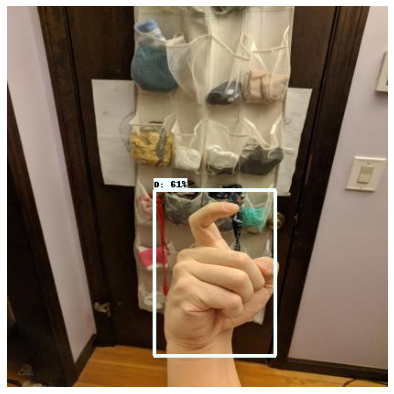

In [81]:
%matplotlib inline

save_file_path = 'x_detect.jpg'
plt.figure(figsize=(8, 7))
plt.imshow(img)
plt.axis('off')
plt.savefig(save_file_path)
plt.show()

# 새로운 이미지 Detection